## Problem

Desiging a circuit that consider a vector of integer numbers as input, and returns a quantum state which is a superposition of the target solution.

> Target solution: Indices of the inputs where two adjacent bits (of binary number corresponding to the integers) will always have different values.

## Solution

Here I've used the Grovers algorithm, to find the state in the superposition of required indices. 

In [59]:
# Importing some important libraries
import numpy as np
from numpy import math
from qiskit import *
from numpy import pi as pi
from math import asin, sqrt
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import seed

In [1]:
import IPython
from IPython.display import display,Latex,Markdown

In [2]:
# Defining a function which flip the sign of the marked state, in the superpositon of all the states.

def orc(d):
    op = np.identity(2**n)
    for i in d:
        op[i][i] = op[i][i]*(-1)
        display(i)
    return op

In [3]:
# Defining another function which flip all the states about the average.

def dif():
    op = np.identity(2**n)
    for i in range(2**n):
        if ( i != 0):
            op[i][i] = op[i][i]*(-1)
    #display(op)
    
    return op

In [5]:
# Taking vector of integer number as input.
display(Latex(r'Expected a vector of length $2^n$ as input!'))

n = int(input('Enter n: '))
a = []
print('Enter the vector:')
for i in range(2**n):
    a.append(int(input()))

print(f'a = {a}')


<IPython.core.display.Latex object>

Enter n: 2
Enter the vector:
1
5
7
10
a = [1, 5, 7, 10]


In [62]:
#Extracting the indices of the input for which two adjacent bits will always have different values.

d = []
b_d = [] 

c = len('{0:b}'.format(max(a))) #number of bits in binary form of highest number in a.

def cd(x):        
    b = '{0:0{d}b}'.format(x,d=c)
    return all(b[i] != b[i+1] for i in range(c-1) )

for i in range(len(a)):
    if cd(a[i]) is True:
        d.append(i)
        b_d.append('{0:0{d}b}'.format(a[i],d=c))

print(f'Indices: {d}, Numbers: {b_d}')


Indices: [1, 3], Numbers: ['0101', '1010']


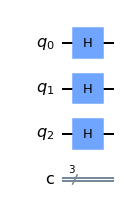

In [64]:
if (n<3):
    if (len(d)>1):
        n = 3       #Because this program requires atleast three qubits to deal with more than one targets.
    else:
        n = n    

#Initiating a quantum circuit

qc = QuantumCircuit(n,n)
qc.h(range(n))

qc.draw()

In [58]:
#To find the number of repetition.
theta = asin(1/sqrt(2**n))

t = int((pi/(2*theta) - 1)/2)


1

3

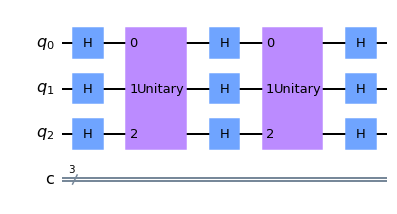

In [65]:
#Finally applying all the component on the circuit.
for i in range(t):
    qc.unitary(orc(d), range(n))
    qc.h(range(n))
    qc.unitary(dif(), range(n))
    qc.h(range(n))

qc.draw()

In [66]:
#To print the statevector.
s_qc = qi.Statevector.from_instruction(qc)
#s_qc.draw('latex', prefix='State = ')

print(s_qc)

Statevector([-1.28915238e-17+0.j,  7.07106781e-01+0.j, -6.15689186e-18+0.j,
              7.07106781e-01+0.j, -3.36731597e-18+0.j,  1.34692639e-17+0.j,
              3.36731597e-18+0.j,  1.34692639e-17+0.j],
            dims=(2, 2, 2))


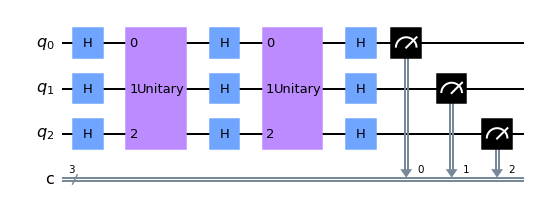

In [67]:
#Applying the measurements.
qc.measure(range(n),range(n))
qc.draw()

In [68]:
#Simulating the circuit
qasm_sim = Aer.get_backend('aer_simulator')
tqc = transpile(qc, basis_gates=['u', 'cx'], optimization_level=3)

print(f"circuit depth: {tqc.depth()}")
print(f"circuit contains {tqc.count_ops()['cx']} CNOTs")

circuit depth: 18
circuit contains 8 CNOTs


{'001': 527, '011': 497}


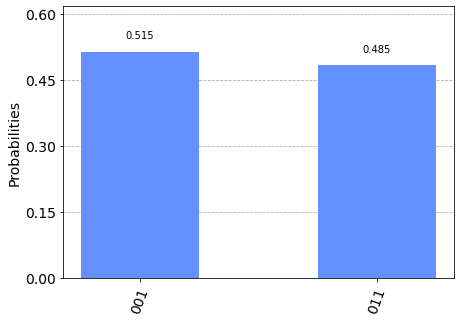

In [69]:
#Getting final state probabilities.
counts = qasm_sim.run(tqc).result().get_counts()

print(counts)
plot_histogram(counts)

### Result
From the histogram, we can see that the output state is in the superposition of the indices (1: 001, 3: 011) of the target numbers.



